# LINEAR REGRESSION

###### Linear regression is used for finding linear relationship between target variable ( Y variable) and one or more predictors (X variables). There are two types of linear regression- Simple and Multiple.


### MULTIPLE LINEAR REGRESSION

In [223]:
## CALLING LIBRARIES USED FOR LINEAR REGRESSION

library("tidyverse")
library("ggplot2")

In [224]:
## CHECKING THE CURRENT WORKING DIRECTORY

getwd()

[1] "C:/Users/T0SHIBA/DataScienceInR/lesson-04"

In [225]:
## STORING DATA IN THE CSV FILE TO VARIABLE data
data = read.csv('C:/Users/T0SHIBA/DataScienceInR/data/clean_data_cars.csv')

In [226]:
## VIEWING THE FIRST 6 ROWS USING HEAD() FUNCTION
head(data)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
4200,BMW,sedan,277,2.0,Petrol,yes,1991
7900,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
13300,Mercedes-Benz,sedan,358,4.7,Gas,yes,2003
23000,Audi,crossover,240,4.2,Petrol,yes,2007
18300,Toyota,crossover,120,2.0,Petrol,yes,2011
40996,Mercedes-Benz,crossover,0,4.7,Petrol,yes,2016


In [227]:
##SUMMARY OF VARIABLES IN THE DATASET; STATISTICAL SUMMARY OF CONTINOUS VARIABLES AND VALUE COUNTS OF CATAGOTICAL VARIABLES
summary(data)

     Price                 Brand            Body         Mileage     
 Min.   :  600   Audi         :420   crossover: 824   Min.   :  0.0  
 1st Qu.: 6999   BMW          :640   hatch    : 268   1st Qu.: 90.0  
 Median :11500   Mercedes-Benz:823   other    : 394   Median :158.0  
 Mean   :15778   Mitsubishi   :307   sedan    :1534   Mean   :162.4  
 3rd Qu.:21900   Renault      :445   vagon    : 379   3rd Qu.:230.0  
 Max.   :44000   Toyota       :510   van      : 626   Max.   :440.0  
                 Volkswagen   :880                                   
    EngineV      Engine.Type   Registration      Year     
 Min.   :0.600   Diesel:1861   no : 371     Min.   :1990  
 1st Qu.:1.800   Gas   : 590   yes:3654     1st Qu.:2003  
 Median :2.200   Other : 106                Median :2007  
 Mean   :2.451   Petrol:1468                Mean   :2006  
 3rd Qu.:3.000                              3rd Qu.:2012  
 Max.   :4.800                              Max.   :2016  
                           

# Price is the Dependent / Predicted variable

### Assumption 1.  All Independent Variables Must have a linear relationship with the Dependent  Variable
### Assumption 2. There should be no Multicollinarity : The Independent variables should not have correlation among themseleves¶

In [228]:
## INSTALLING LIBRARY TO PLOT CORRELATION PLOT

##install.packages("ggcorrplot")

In [229]:
library("ggcorrplot")


In [230]:
## STORING ALL CONTINOUS INTO DATAFRAME "df"

df <- data %>% select(Price,Mileage,EngineV,Year)

In [231]:
## STORING CORRELATION BETWEEN VARIABLES INTO DATAFRAME "df"

corr <- round(cor(df), 1)

In [232]:
corr

,Price,Mileage,EngineV,Year
Price,1.0,-0.6,0.5,0.7
Mileage,-0.6,1.0,0.0,-0.7
EngineV,0.5,0.0,1.0,0.0
Year,0.7,-0.7,0.0,1.0


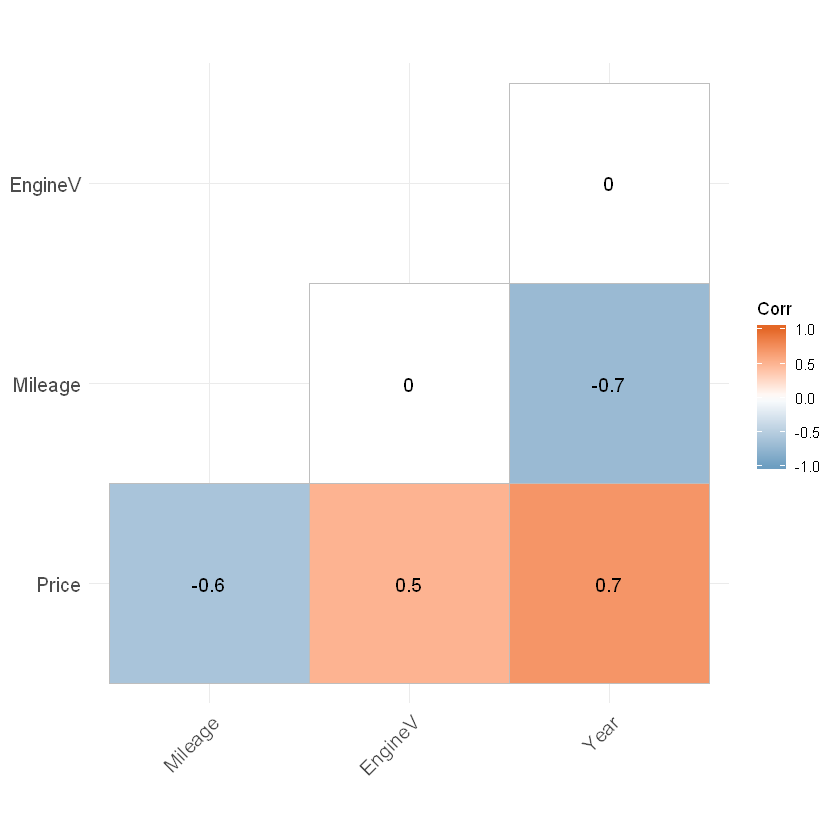

In [233]:
## USING ggcorrplot TO PLOT CORRELATION MATRIX

ggcorrplot(corr,lab=TRUE,type='lower',colors = c("#6D9EC1", "white", "#E46726"))

In [234]:
dim(data)

[1] 4025    8

In [235]:
## SPLITTING DATA INTO TEST AND TRAIN DATA
data_train = slice(data, 1:3000)
data_test = slice(data, 3001:4025)

In [236]:
head(data)

Price,Brand,Body,Mileage,EngineV,Engine.Type,Registration,Year
4200,BMW,sedan,277,2.0,Petrol,yes,1991
7900,Mercedes-Benz,van,427,2.9,Diesel,yes,1999
13300,Mercedes-Benz,sedan,358,4.7,Gas,yes,2003
23000,Audi,crossover,240,4.2,Petrol,yes,2007
18300,Toyota,crossover,120,2.0,Petrol,yes,2011
40996,Mercedes-Benz,crossover,0,4.7,Petrol,yes,2016


## MODEL I : WITHOUT CATAGORICAL VARIABLES

In [237]:
## BUILDING MODEL WITHOUT CATAGORICAL VARIABLE
model_1 <- lm(Price~Mileage+EngineV+Year, data = data_train)

In [238]:
## SUMMARY OF MODEL
summary(model_1)


Call:
lm(formula = Price ~ Mileage + EngineV + Year, data = data_train)

Residuals:
   Min     1Q Median     3Q    Max 
-25380  -4683  -1044   3911  30801 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.787e+06  5.629e+04  -31.75   <2e-16 ***
Mileage     -3.150e+01  1.801e+00  -17.49   <2e-16 ***
EngineV      5.685e+03  1.384e+02   41.08   <2e-16 ***
Year         8.940e+02  2.795e+01   31.99   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 6848 on 2996 degrees of freedom
Multiple R-squared:  0.6681,	Adjusted R-squared:  0.6677 
F-statistic:  2010 on 3 and 2996 DF,  p-value: < 2.2e-16


In [239]:
model_1


Call:
lm(formula = Price ~ Mileage + EngineV + Year, data = data_train)

Coefficients:
(Intercept)      Mileage      EngineV         Year  
 -1786995.8        -31.5       5685.1        894.0  


In [240]:
#Predicting values
predicted_price <- predict(model_1,newdata =data_test)

#coverting into df
predicted_price = as.data.frame.vector(predicted_price)

In [241]:
head(predicted_price)

predicted_price
27480.57
20269.88
11016.15
18891.39
19467.44
22684.97


In [242]:
library(car)

In [243]:
vif(model_1)

Mileage  EngineV     Year 
2.006907 1.000289 2.006695

In [244]:
actual_price = data_test$Price
actual_price = as.data.frame.vector(actual_price)

In [245]:
head(actual_price)

actual_price
36700
25500
9300
11299
12900
23600


In [260]:
## DEFINING FUNCTION FOR MSE

mse <- function(predicted,actual,n)
{
    mse = sum(((actual-predicted)/n)^2)
    return (mse)
}

In [247]:
dim(data_test)

[1] 1025    8

In [248]:
## USING FUNCTION "MSE" FOR CALCULATING MEAN SQUARED ERROR
mse=round(mse(predicted_price,actual_price,1025))

In [249]:
mse

[1] 45453

In [250]:
rmse=round(sqrt(mse))
rmse

[1] 213

# MODEL II : INCLUDING CATAGORICAL VARIABLES

In [251]:
names(data)

[1] "Price"        "Brand"        "Body"         "Mileage"      "EngineV"     
[6] "Engine.Type"  "Registration" "Year"

In [252]:
model_2 <- lm(Price~Brand+Body+Mileage+EngineV+Engine.Type+Registration+Year, data = data_train)

In [253]:
summary(model_2)


Call:
lm(formula = Price ~ Brand + Body + Mileage + EngineV + Engine.Type + 
    Registration + Year, data = data_train)

Residuals:
     Min       1Q   Median       3Q      Max 
-27186.4  -3659.9   -774.8   3184.2  28398.0 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.626e+06  4.988e+04 -32.609  < 2e-16 ***
BrandBMW            9.654e+02  4.144e+02   2.329 0.019902 *  
BrandMercedes-Benz -5.403e+01  4.016e+02  -0.135 0.892972    
BrandMitsubishi    -8.191e+03  4.993e+02 -16.404  < 2e-16 ***
BrandRenault       -9.264e+03  4.712e+02 -19.659  < 2e-16 ***
BrandToyota        -4.373e+03  4.462e+02  -9.800  < 2e-16 ***
BrandVolkswagen    -4.260e+03  4.001e+02 -10.649  < 2e-16 ***
Bodyhatch          -5.736e+03  5.195e+02 -11.042  < 2e-16 ***
Bodyother          -4.208e+03  4.203e+02 -10.011  < 2e-16 ***
Bodysedan          -5.006e+03  3.235e+02 -15.473  < 2e-16 ***
Bodyvagon          -5.826e+03  4.645e+02 -12.544  < 2e-16 ***
Bodyvan        

In [254]:
model_2


Call:
lm(formula = Price ~ Brand + Body + Mileage + EngineV + Engine.Type + 
    Registration + Year, data = data_train)

Coefficients:
       (Intercept)            BrandBMW  BrandMercedes-Benz     BrandMitsubishi  
        -1.626e+06           9.654e+02          -5.403e+01          -8.191e+03  
      BrandRenault         BrandToyota     BrandVolkswagen           Bodyhatch  
        -9.264e+03          -4.373e+03          -4.260e+03          -5.736e+03  
         Bodyother           Bodysedan           Bodyvagon             Bodyvan  
        -4.208e+03          -5.006e+03          -5.826e+03          -7.288e+03  
           Mileage             EngineV      Engine.TypeGas    Engine.TypeOther  
        -2.930e+01           3.176e+03          -2.935e+03          -2.474e+03  
 Engine.TypePetrol     Registrationyes                Year  
        -2.182e+03           6.840e+03           8.181e+02  


In [255]:
#Predicting values
predicted_price <- predict(model_2,newdata = data_test[2:8])

#coverting into df
predicted_price = as.data.frame.vector(predicted_price)

In [256]:
head(predicted_price)

predicted_price
30422.030
26184.606
9108.248
18759.529
18414.859
19075.932


In [257]:
vif(model_2)

,GVIF,Df,GVIF^(1/(2*Df))
Brand,2.206532,6,1.068175
Body,2.732900,5,1.105764
Mileage,2.394812,1,1.547518
EngineV,1.611154,1,1.269312
Engine.Type,1.756799,3,1.098467
Registration,1.203961,1,1.097251
Year,2.414859,1,1.553982


In [258]:
actual_price = data_test$Price
actual_price = as.data.frame.vector(actual_price)
head(actual_price)

actual_price
36700
25500
9300
11299
12900
23600


In [261]:
## USING FUNCTION "MSE" FOR CALCULATING MEAN SQUARED ERROR
mse_model2=round(mse(predicted_price,actual_price,1025))

In [262]:
mse_model2

[1] 30277

In [263]:
rmse_model2 = round(sqrt(mse_model2))
rmse_model2

[1] 174